<center>
<h1>Analisi delle vendite dei videogiochi nel mondo</h1>
<p>Antonio Pelusi</p>
<p>Matricola: 182267</p>
<p>257241@studenti.unimore.it</p>
</center>

## Indice
0. **Introduzione**

1. **Collezione dei dati**

    - Dataset vendite videogiochi

    - Dataset vendite console

2. **Elaborazione dei dati**

    - Pulizia dei dataset

    - Controllo validità delle vendite globali

3. **Analisi esplorativa**
    
    - Dataset videogames
    
    - Dataset consoles

4. **Testing**
    - Calcolo della correlazione tra consoles con più videogiochi popolari e console più popolari

    - d
    
5. **Risultati e conclusioni**

---

## **Introduzione**
Nel lontano 1962, un gruppo di studenti del *Massachussetts Institute of Technology* sviluppò un gioco chiamato *Spacewar!* sul computer DEC PDP-1.

Il gioco fu presto incluso in tutti i nuovi computer DEC, diventando così il primo videogioco della storia largamente distribuito.

Da allora, il settore videoludico ha subito un processo di crescita costante, che va di pari passo con il progresso tecnologico dei computer stessi.

Il presente studio vuole raccogliere ed analizzare informazioni sulla crescita dei videogiochi dagli anni 80' (decennio della nascita delle prime console videoludiche) ad oggi in base alle copie vendute (sia continentali che globali), per poi confrontarle con la vendita di console, mettendone in risalto l'eventuale livello di correlazione.

---

## **1: Collezione dei dati**
Questa prima fase prevede la raccolta dei dati necessari all'analisi prevista.

Per lo studio appena introdotto, sarà necessario avere due datasets:
- Dataset contenente le informazioni sulle vendite dei videogiochi
- Dataset contenente le informazioni sulle vendite delle console

### Dataset vendite videogiochi
Per un'analisi corretta sarà necessario avere un dataset aggiornato.
Uno dei database di riferimento nel campo videoludico è [vgChartz.com](https://www.vgchartz.com/gamedb/).
Questo database viene costantemente aggiornato, ma non prevede il download del dataset.
Pertanto sarà necessario effettuare lo *scraping* della pagina web al fine di ottenere un dataset in un formato analizzabile (CSV, JSON ecc...).

Lo script utilizzato per lo *scraping* del database online [vgChartz.com](https://www.vgchartz.com/gamedb/) è stato sviluppato in Python sulla base dello script [vgChartScrape](https://github.com/GregorUT/vgchartzScrape) utilizzando la libreria Python [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/).

Essendo l'operazione di *scraping* dell'intero database molto dispendiosa a livello di tempo (~1 secondo per videogioco, per un totale di 16598 videogiochi, ~5 ore!), verrà fornito insieme al seguente notebook il dump del database in formato CSV, chiamato **vgsales.csv**, generato dallo script Python **vgchartz-scraper.py** appositamente sviluppato.

Il dataset ottenuto presenta la seguente struttura:

|Campi| Definizione|
|:-|:-|
|Rank|Valore unico, indica la posizione del videogioco nella classifica globale per vendite|
|Name|Nome del videogioco|
|Platform|Codice identificativo della console per cui è stato sviluppato il gioco|
|Year|Anno di rilascio del videogioco|
|Genre|Genere del videogioco|
|Publisher|Nome dell'editore del videogioco|
|NA_Sales|Vendite (in milioni) del videogioco in Nord America|
|EU_Sales|Vendite (in milioni) del videogioco in Europa|
|JP_Sales|Vendite (in milioni) del videogioco in Giappone|
|Other_Sales|Vendite (in milioni) del videogioco nel resto del mondo|
|Global_Sales|Vendite totali (in milioni) del videogoco|

### Dataset vendite console
Il secondo dataset contiene informazioni sulla vendita delle console nel mondo.
È scaricare e consultabile al seguente link: [Kaggle.com](https://www.kaggle.com/datasets/jaimepazlopes/game-console-manufactor-and-sales).

Questo dataset è stato ottenuto effettuando lo *scraping* della seguente pagina [Wikipedia](https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles).

Il dataset originale presenta la seguente struttura:

|Campi| Definizione|
|:-|:-|
|ConsoleID|Codice identificativo della console|
|Console_Name|Nome della console|
|Manufacturer|Produttore della console|
|Release_Year|Anno di rilascio della console|
|Sales|Vendite totali (in milioni) della console|
|Type|Tipo di console (Home/Handled)|

---

## **2: Elaborazione dei dati**
In questa fase verranno puliti e riorganizzati i dati.

Importazione librerie

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.simplefilter(action='ignore')


Importazione datasets:

In [2]:
videogames = pd.read_csv('vgsales.csv')
videogames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
consoles = pd.read_csv('console.csv')
consoles.head()

,ConsoleID,Console_Name,Manufacturer,Release_Year,Sales,Type
0,PC,Personal Computer,Computer,1975,1000.00,Home
1,PS2,PlayStation 2,Sony,2000,155.00,Home
2,DS,Nintendo DS,Nintendo,2004,154.02,Handheld
3,GB,Game Boy,Nintendo,1989,118.69,Handheld
4,PS4,PlayStation 4,Sony,2013,108.90,Home


### Pulizia dei dataset


Controllo del numero dei records presenti nei datasets:

In [4]:
print("Numero di videogiochi registrati:\t", videogames.shape[0], "\nNumero di console registrate:\t\t", consoles.shape[0])

Numero di videogiochi registrati:	 16598 
Numero di console registrate:		 44


Controllo se tutti i records sono completi:

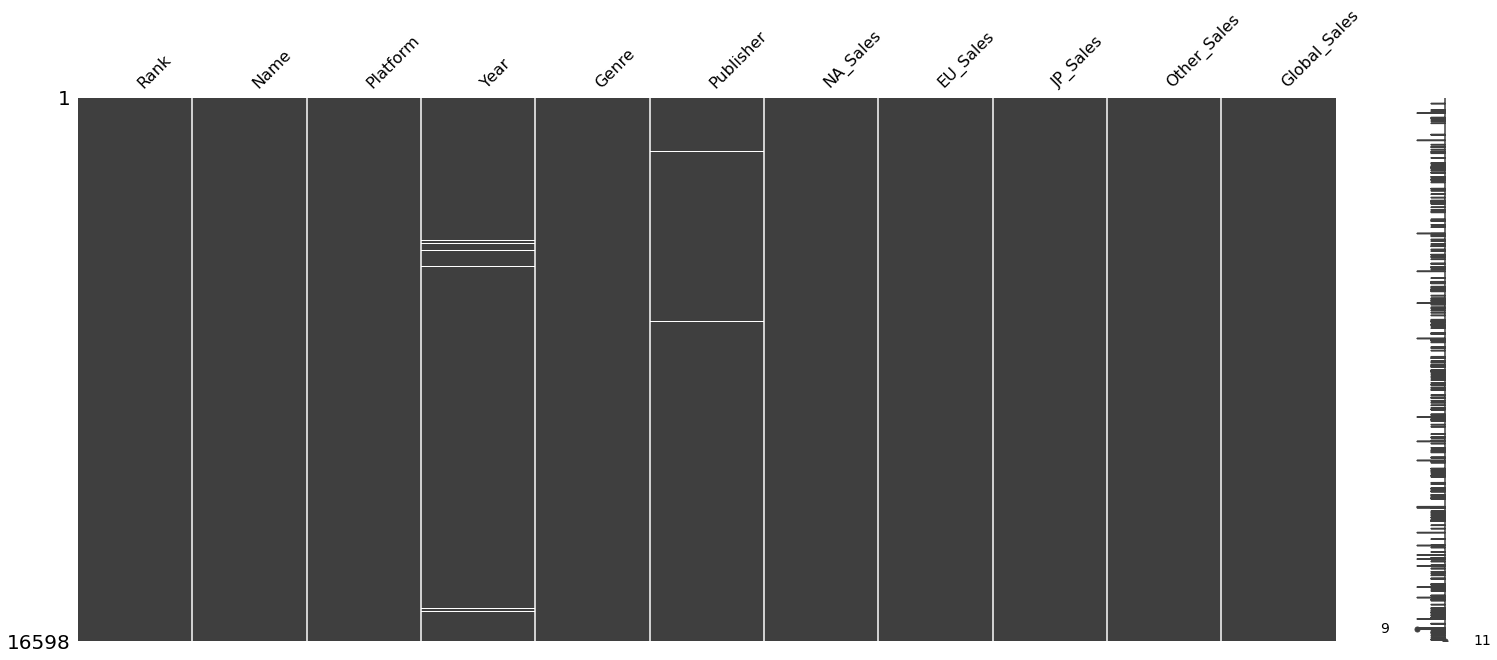

In [5]:
msno.matrix(videogames);

Come intuibile dalle colonne *Year* e *Publisher*, vi sono diversi valori mancanti.

Per avere risultati affidabili in fase di analisi, è necessario scartare questi records:

In [6]:
videogames.dropna(axis=0, how='any',inplace=True)

Test:

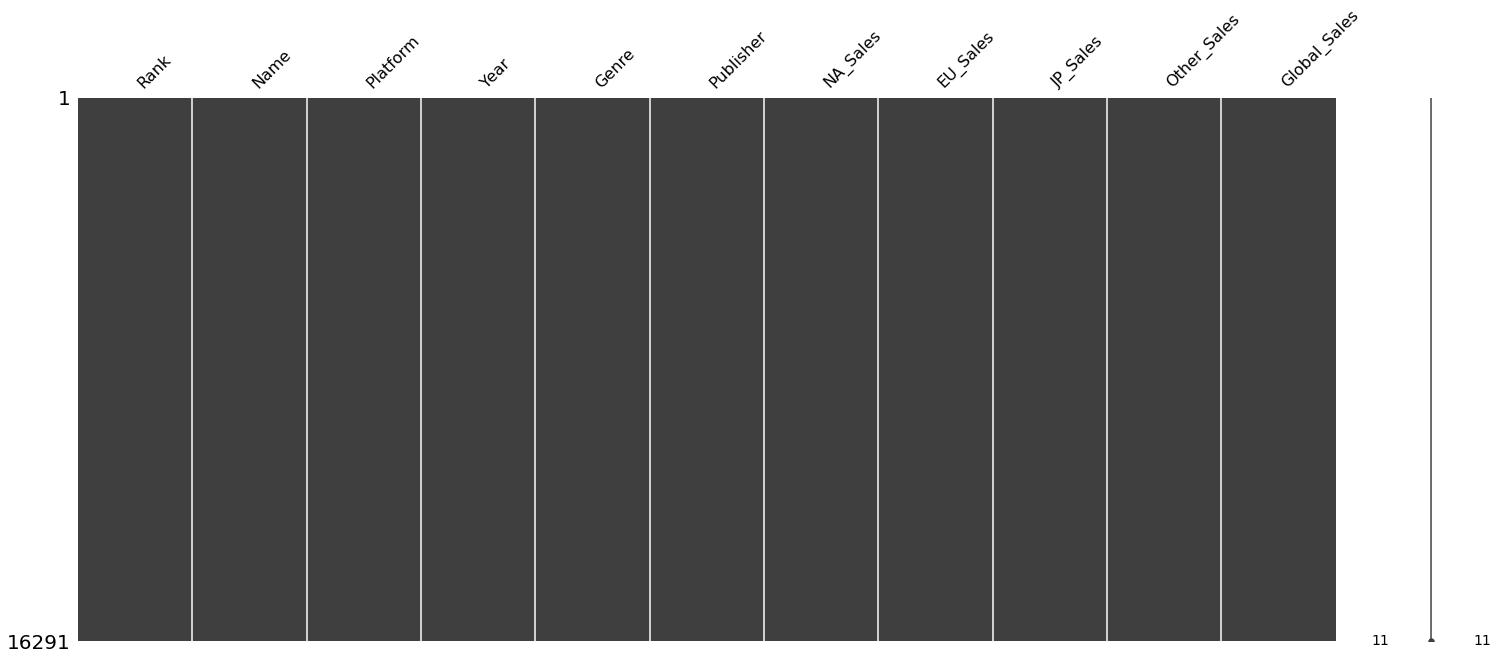

In [7]:
msno.matrix(videogames);

Controllo infine se sono presenti records duplicati:

In [8]:
print("Numero di videogiochi duplicati:\t", videogames[videogames.duplicated()].shape[0], "\nNumero di console duplicate:\t\t", consoles[consoles.duplicated()].shape[0])

Numero di videogiochi duplicati:	 0 
Numero di console duplicate:		 0


### Controllo validità delle vendite globali
Il valore delle vendite globali deve rispettare la seguente equazione:

vendite globali = vendite NA + vendite EU + vendite JP + vendite nel resto del mondo

Controllo prima il minimo valore delle vendite globali presente nel dataset, per poi contare il numero di records che hanno il valore errato delle vendite globali:

In [9]:
min_gs_value = videogames['Global_Sales'].min()
min_gs_value

0.01

In [10]:
test = videogames[videogames['Global_Sales']>min_gs_value]
test[test['Global_Sales'] != test['NA_Sales']+test['EU_Sales']+test['JP_Sales']+test['Other_Sales']].shape[0]

6636

In 6636 records, il valore delle vendite globali di un videogioco è errato.

Procedo quindi a correggere i valori nel dataframe videogames:

In [11]:
videogames['Global_Sales'] = videogames['NA_Sales'] + videogames['EU_Sales'] + videogames['JP_Sales']+videogames['Other_Sales']

Test:

In [12]:
videogames[videogames['Global_Sales'] != videogames['NA_Sales']+videogames['EU_Sales']+videogames['JP_Sales']+videogames['Other_Sales']].shape[0]

0

### Controllo editori con pochi giochi pubblicati
Gli editori che hanno pubblicato pochi giochi potrebbero rendere la media non accurata.
Ad esempio, se un editore avesse pubblicato un solo gioco, la media delle vendite globali di quell'editore sarebbe il valore delle vendite globali del gioco stesso.

Pertanto, controllo in media quanti giochi gli editori hanno pubblicato:

In [13]:
videogames['Publisher'].value_counts().describe()

count     576.000000
mean       28.282986
std       115.417374
min         1.000000
25%         1.000000
50%         3.000000
75%        10.000000
max      1339.000000
Name: Publisher, dtype: float64

Si può notare che circa il 50% degli editori ha pubblicato 3 o meno videogiochi.

Procedo quindi con la rimozione dei videogiochi assegnati a questi editori:

In [14]:
editori = list(videogames['Publisher'].value_counts()[videogames['Publisher'].value_counts()>3].index)

videogames = videogames[videogames['Publisher'].isin(editori)]

Conto il numero di records attualmente nel database:

In [15]:
videogames['Name'].count()

15797

> Il database pulito e corretto ora contiene 15797 videogiochi ed è pronto per la fase di analisi.

---

## 3: **Analisi esplorativa**
In questa fase verranno analizzati singolarmente i datasets al fine di ricavare informazioni attraverso statistiche e grafici.

### Dataset videogames

**Videogiochi più venduti al mondo:**

In [16]:
videogames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


**Distribuzione vendite dei videogiochi per genere nel mondo:**

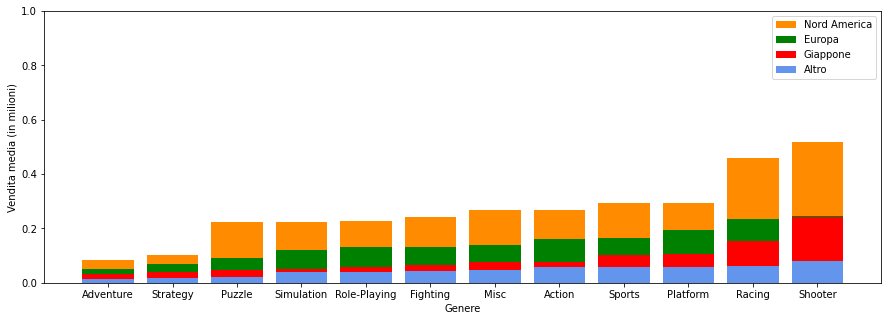

In [17]:
plt.figure(figsize=(15,5))
plt.bar(range(0,12), list(videogames.groupby('Genre')['NA_Sales'].mean().sort_values().values), tick_label=list(videogames.groupby('Genre')['NA_Sales'].mean().sort_values().index), color = 'darkorange', label = 'Nord America')
plt.bar(range(0,12), list(videogames.groupby('Genre')['EU_Sales'].mean().sort_values().values), tick_label=list(videogames.groupby('Genre')['EU_Sales'].mean().sort_values().index), color = 'green', label = 'Europa')
plt.bar(range(0,12), list(videogames.groupby('Genre')['JP_Sales'].mean().sort_values().values), tick_label=list(videogames.groupby('Genre')['JP_Sales'].mean().sort_values().index), color = 'red', label = 'Giappone')
plt.bar(range(0,12), list(videogames.groupby('Genre')['Other_Sales'].mean().sort_values().values), tick_label=list(videogames.groupby('Genre')['Other_Sales'].mean().sort_values().index), color = 'cornflowerblue', label = 'Altro')
plt.legend()
plt.xlabel('Genere')
plt.ylabel('Vendita media (in milioni)')
plt.ylim(0,1)
plt.show();

In media, il genere più venduto è Shooter, ma come mostrato dai prossimi due esempi, questo valore non coincide con il genere più venduto in assoluto nel mondo:

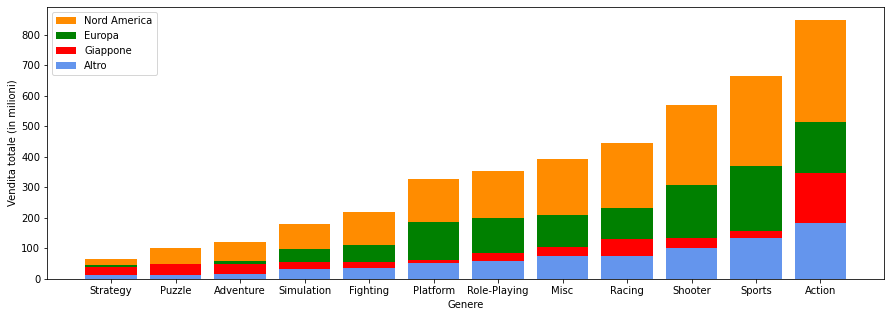

In [18]:
plt.figure(figsize=(15,5))
plt.bar(range(0,12), list(videogames.groupby('Genre')['NA_Sales'].sum().sort_values().values), tick_label=list(videogames.groupby('Genre')['NA_Sales'].sum().sort_values().index), color = 'darkorange', label = 'Nord America')
plt.bar(range(0,12), list(videogames.groupby('Genre')['EU_Sales'].sum().sort_values().values), tick_label=list(videogames.groupby('Genre')['EU_Sales'].sum().sort_values().index), color = 'green', label = 'Europa')
plt.bar(range(0,12), list(videogames.groupby('Genre')['JP_Sales'].sum().sort_values().values), tick_label=list(videogames.groupby('Genre')['JP_Sales'].sum().sort_values().index), color = 'red', label = 'Giappone')
plt.bar(range(0,12), list(videogames.groupby('Genre')['Other_Sales'].sum().sort_values().values), tick_label=list(videogames.groupby('Genre')['Other_Sales'].sum().sort_values().index), color = 'cornflowerblue', label = 'Altro')
plt.legend()
plt.xlabel('Genere')
plt.ylabel('Vendita totale (in milioni)')
plt.show();

Con una rappresentazione a torta possiamo notare la vendita globale per genere:

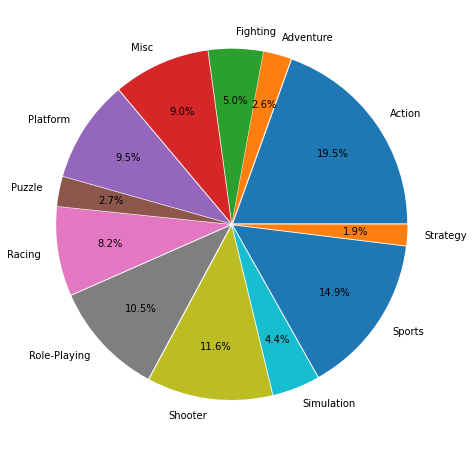

In [19]:
vg = videogames.groupby(['Genre'])['Global_Sales'].sum()

pie, ax = plt.subplots(figsize=[12, 8])
labels = vg.keys()
plt.pie(x = vg, autopct="%.1f%%", explode=[0.01]*vg.count(), labels=labels, pctdistance=0.7)
plt.show();

> Nonostante in media il genere Shooter risulti quello più venduto, nelle vendite globali complessive il genere di videogiochi più venduto è Action.
Questo è dovuto alla forte disparità delle vendite dei singoli videogiochi, i quali abbassano la media complessiva rispetto al totale.

**Editori con più copie vendute:**

In [20]:
videogames.groupby('Publisher')['Global_Sales'].mean().sort_values()[-5:]

Publisher
Imagic                                1.205000
Microsoft Game Studios                1.300423
Sony Computer Entertainment Europe    1.592000
RedOctane                             2.172500
Nintendo                              2.563549
Name: Global_Sales, dtype: float64

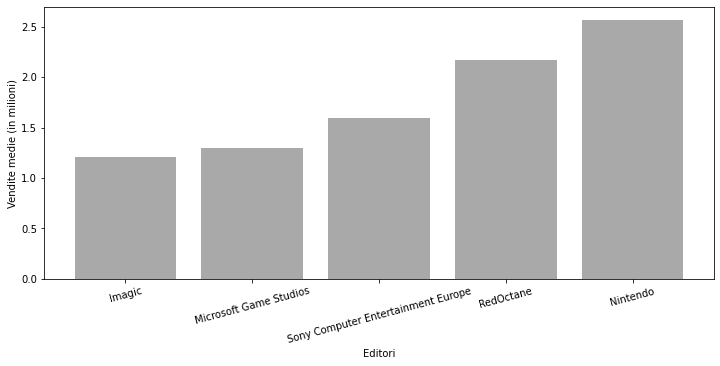

In [81]:
plt.figure(figsize=(12,5))
plt.bar(videogames.groupby('Publisher')['Global_Sales'].mean().sort_values()[-5:].index, videogames.groupby('Publisher')['Global_Sales'].mean().sort_values()[-5:].values, color = 'darkgrey')
plt.xlabel('Editori')
plt.ylabel('Vendite medie (in milioni)')
plt.xticks(rotation=15);

> Nintendo risulta l'editore con più vendite totali.

**Console appartenenti ai videogiochi più venduti:**

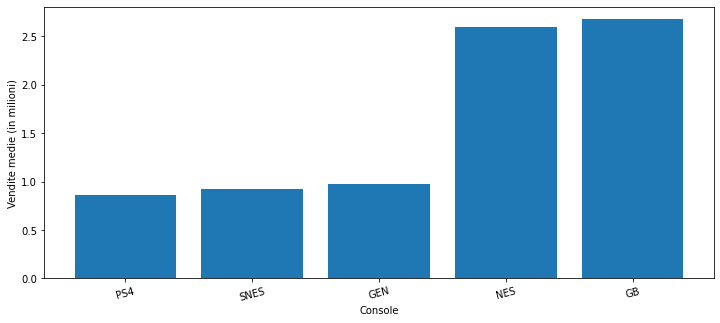

In [82]:
plt.figure(figsize=(12,5))
plt.bar(videogames.groupby('Platform')['Global_Sales'].mean().sort_values()[-5:].index, videogames.groupby('Platform')['Global_Sales'].mean().sort_values()[-5:].values)
plt.xlabel('Console')
plt.ylabel('Vendite medie (in milioni)')
plt.xticks(rotation=15);

> La maggior parte dei videogiochi con più vendite è stato sviluppato per GameBoy e NES.
Nella fase di testing verrà cercata una correlazione tra queste informazioni e le consoles più vendute di sempre (che verranno ricavate dal database *Console*).

**Decennio con il maggior numero di vendite di videogiochi:**

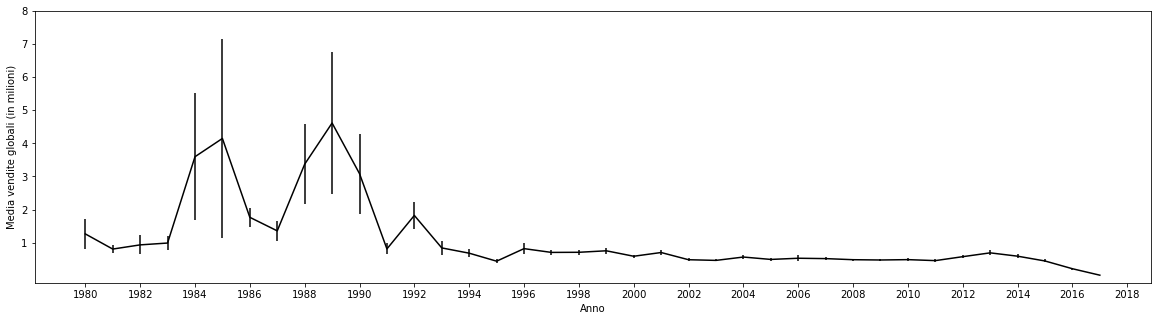

In [41]:
plt.figure(figsize=(20,5))

min_year = int(videogames['Year'].min())
max_year = int(videogames['Year'].max())

edges = np.arange(min_year, max_year)
centers = (edges)[:-1]

data = pd.cut(videogames['Year'], edges, right = False, include_lowest = True)

# calcolo media (linea principale sul grafico)
y_means = videogames['Global_Sales'].groupby(data).mean()

# calcolo errore standard della media (linee verticali sul grafico)
y_sems = videogames['Global_Sales'].groupby(data).sem()

plt.errorbar(x = centers, y = y_means, yerr = y_sems, color='black')
plt.xlabel('Anno')
plt.ylabel('Media vendite globali (in milioni)')
plt.xticks(range(min_year,max_year,2), range(min_year,max_year,2))
plt.yticks(range(1,9))
plt.show();

> Il decennio con il maggior numero di vendite di videogiochi va dal 1983 al 1993.

I 5 videogiochi più venduti di quel periodo sono i seguenti:

In [24]:
vg = videogames[videogames['Year']>=1983]
vg = vg[vg['Year'] < 1993]
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.62
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14


> Rispetto alla classifica dei videogiochi più venduti al mondo spicca *Super Mario Bros*, con *Rank* globale 2.

**Relazione tra le vendite dei videogiochi nelle varie parti del mondo:**

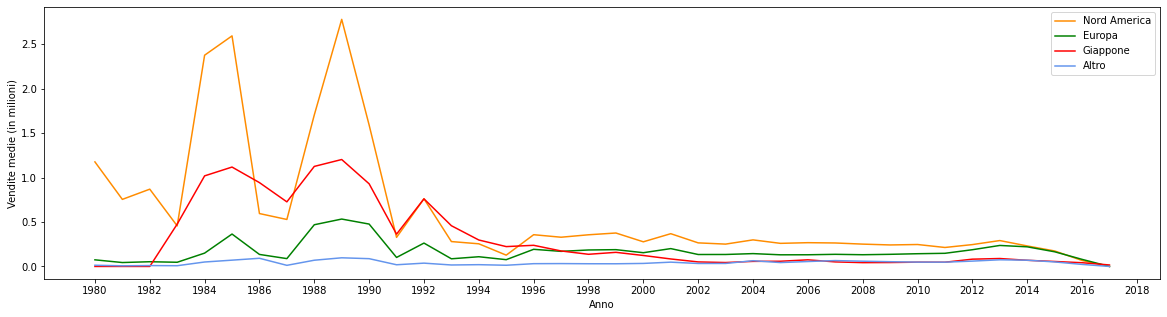

In [44]:
plt.figure(figsize=(20,5))

min_year = int(videogames['Year'].min())
max_year = int(videogames['Year'].max())

edges = np.arange(min_year, max_year)
centers = (edges)[:-1]

data = pd.cut(videogames['Year'], edges, right = False, include_lowest = True)
y_means = videogames['NA_Sales'].groupby(data).mean()
plt.errorbar(x = centers, y = y_means, color = 'darkorange', label = 'Nord America')
y_means = videogames['EU_Sales'].groupby(data).mean()
plt.errorbar(x = centers, y = y_means, color = 'green', label = 'Europa')
y_means = videogames['JP_Sales'].groupby(data).mean()
plt.errorbar(x = centers, y = y_means, color = 'red', label = 'Giappone')
y_means = videogames['Other_Sales'].groupby(data).mean()
plt.errorbar(x = centers, y = y_means, color = 'cornflowerblue', label = 'Altro')

plt.xlabel('Anno')
plt.ylabel('Vendite medie (in milioni)')
plt.xticks(range(min_year,max_year,2), range(min_year,max_year,2))
plt.legend()
plt.show()

> In Nord America si ha il maggior numero di copie vendute di videogiochi rispetto al resto del mondo.

**Relazione tra le migliori 5 piattaforme negli anni:**

Da un'analisi precedente risulta che le consoles appartenenti ai videogiochi più venduti sono le seguenti:
- GameBoy
- NES
- SEGA GENESIS
- SNES
- PlayStation 4

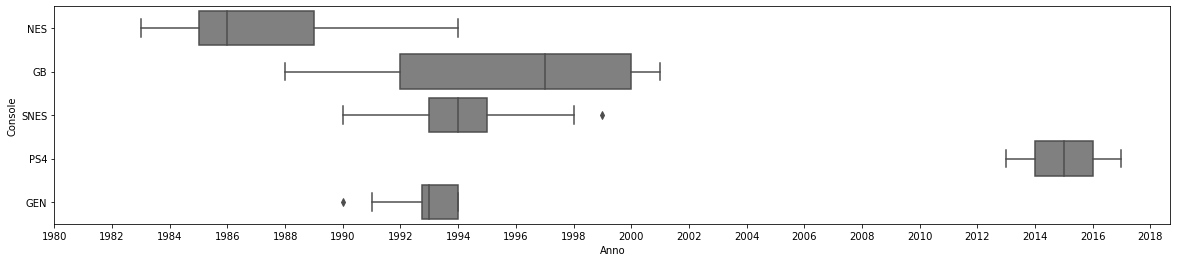

In [50]:
min_year = int(videogames['Year'].min())
max_year = int(videogames['Year'].max())

vg = videogames[videogames['Platform'].isin(['PS4', 'SNES', 'GEN', 'NES', 'GB'])]
plt.figure(figsize=(20,4))
sb.boxplot(data = vg, x = 'Year', y = 'Platform', color = 'grey')
plt.xlabel('Anno')
plt.ylabel('Console');
plt.xticks(range(min_year,max_year,2), range(min_year,max_year,2));

> Si può notare che, tra le consoles con più videogiochi popolari di sempre, 4 consoles su 5 sono state popolari prima del 2002.

### Dataset consoles

---

## 4: **Testing**


### Calcolo della correlazione


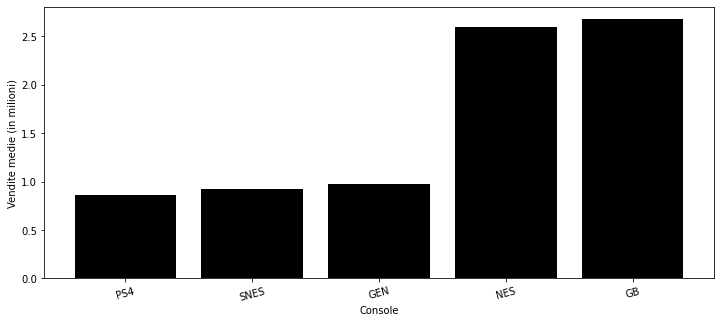

In [87]:
plt.figure(figsize=(12,5))
plt.bar(videogames.groupby('Platform')['Global_Sales'].mean().sort_values()[-5:].index, videogames.groupby('Platform')['Global_Sales'].mean().sort_values()[-5:].values, color='black', label='Vendite vid')
plt.xlabel('Console')
plt.ylabel('Vendite medie (in milioni)')
plt.xticks(rotation=15);

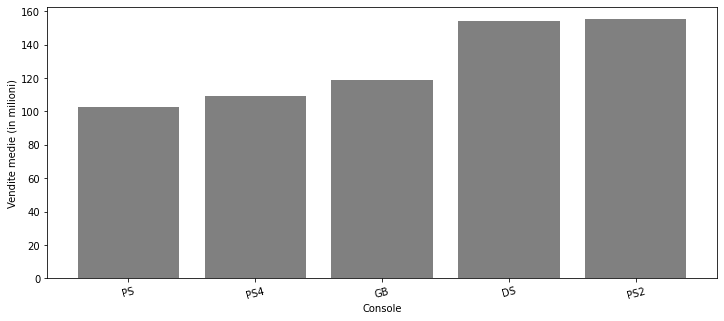

In [90]:
plt.figure(figsize=(12,5))
plt.bar(consoles.groupby('ConsoleID')['Sales'].mean().sort_values()[-6:-1].index, consoles.groupby('ConsoleID')['Sales'].mean().sort_values()[-6:-1].values, color='grey', label='Vendite consoles')
plt.xlabel('Console')
plt.ylabel('Vendite medie (in milioni)')
plt.xticks(rotation=15);

---

## 5: **Risultati e conclusioni**
